### Import necesary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.set_theme()

### Read data in a DataFrame

In [3]:
data = pd.read_csv('dataset/Cluj_1921_2025.csv')

### Displaying raw data for analysis

In [4]:
data

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,1921-03-01,NaN,36.0,30.0,NaN,NaN,NaN
1,1921-03-02,NaN,39.0,34.0,NaN,NaN,NaN
2,1921-03-03,NaN,40.0,32.0,NaN,NaN,NaN
3,1921-03-04,NaN,43.0,32.0,NaN,NaN,NaN
4,1921-03-05,NaN,45.0,28.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
37996,2025-03-11,52.0,NaN,NaN,0.00,NaN,NaN
37997,2025-03-12,54.0,NaN,NaN,0.00,NaN,NaN
37998,2025-03-13,57.0,NaN,NaN,0.00,NaN,NaN
37999,2025-03-14,54.0,NaN,NaN,0.07,NaN,NaN


### Convert 'Date' row to 'datetime'

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

### Extracting all data between 2022-2024

In [6]:
# Specifing the desired years to extract
desired_years = [2022, 2023, 2024]

# Extract weather data from 2022 to 2024 using a query
years_2022_to_2024 = data.query(f'(Date.dt.year >= {desired_years[0]}) & (Date.dt.year <= {desired_years[2]})')

### Display the extracted data

In [7]:
years_2022_to_2024

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
36831,2022-01-01,46.0,53.0,39.0,0.03,NaN,NaN
36832,2022-01-02,45.0,50.0,41.0,0.00,NaN,NaN
36833,2022-01-03,42.0,53.0,36.0,0.00,NaN,NaN
36834,2022-01-04,44.0,52.0,38.0,0.07,NaN,NaN
36835,2022-01-05,48.0,56.0,43.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...
37922,2024-12-27,34.0,43.0,NaN,0.01,NaN,NaN
37923,2024-12-28,30.0,41.0,NaN,0.00,NaN,NaN
37924,2024-12-29,28.0,NaN,NaN,0.00,NaN,NaN
37925,2024-12-30,28.0,30.0,26.0,0.00,NaN,NaN


### Separate data by month

##### Each month will be stored in a separate DataFrame

In [8]:
# Creating a empty list that will contain a DataFrame for each month
years_2022_2024_months_list = []

for i in range(3):

    for j in range (12):

        # Extract a specific month of the year
        specific_month = years_2022_to_2024.query(f'(Date.dt.year == {desired_years[i]}) & (Date.dt.month == {j + 1})')

        # Add the extracted month in the list
        years_2022_2024_months_list.append(specific_month)

##### Printing the month "July" that is represented by the index 6 (the list starts with index 0)

In [9]:
years_2022_2024_months_list[6]

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
37012,2022-07-01,80.0,96.0,64.0,0.00,NaN,NaN
37013,2022-07-02,77.0,92.0,65.0,0.02,NaN,NaN
37014,2022-07-03,76.0,89.0,63.0,0.00,NaN,NaN
37015,2022-07-04,78.0,92.0,64.0,0.02,NaN,NaN
37016,2022-07-05,81.0,95.0,64.0,0.00,NaN,NaN
37017,2022-07-06,65.0,85.0,63.0,0.15,NaN,0.8
37018,2022-07-07,67.0,78.0,53.0,0.67,NaN,NaN
37019,2022-07-08,69.0,81.0,54.0,0.00,NaN,NaN
37020,2022-07-09,69.0,77.0,59.0,0.00,NaN,NaN
37021,2022-07-10,63.0,75.0,55.0,0.00,NaN,NaN


### Get the average from each month

In [10]:
# A special list to store each month average temperature
mean_avg_temn_months_list = []
# A special list to store each month average precipitations in inches
mean_prcp_inches_list = []

for i in range(len(years_2022_2024_months_list)):

    mean_month_avg_temp = np.mean(years_2022_2024_months_list[i]['TAVG (Degrees Fahrenheit)'])
    mean_month_prcp = np.mean(years_2022_2024_months_list[i]['PRCP (Inches)'])

    mean_avg_temn_months_list.append(mean_month_avg_temp)
    mean_prcp_inches_list.append(mean_month_prcp)


#### The average temperature from the first month (index 0)

In [11]:
mean_avg_temn_months_list[0]

30.225806451612904

#### Print maximum precipitation in inches

In [12]:
max(mean_prcp_inches_list)

0.19133333333333333

#### Converting average temperature list in a numpy array

In [13]:
mean_avg_temn_months_list_np = np.ravel(mean_avg_temn_months_list)

mean_avg_temn_months_list_np

array([30.22580645, 35.07142857, 38.22580645, 47.73333333, 60.19354839,
       68.86666667, 71.90322581, 71.48387097, 57.73333333, 50.70967742,
       42.16666667, 35.61290323, 38.12903226, 33.28571429, 43.09677419,
       48.13333333, 59.41935484, 66.46666667, 71.38709677, 71.87096774,
       65.5       , 54.03225806, 41.76666667, 34.87096774, 32.25806452,
       43.37931034, 45.81481481, 54.93333333, 60.76666667, 71.36666667,
       74.67741935, 73.9       , 63.33333333, 49.41935484, 36.65384615,
       34.1       ])

#### Converting average precipitation list in a numpy array

In [14]:
mean_prcp_inches_list_np = np.ravel(mean_prcp_inches_list)

mean_prcp_inches_list_np

array([0.02129032, 0.01607143, 0.01258065, 0.06433333, 0.11677419,
       0.033     , 0.03225806, 0.11129032, 0.117     , 0.04032258,
       0.06533333, 0.03032258, 0.06      , 0.07928571, 0.02516129,
       0.07866667, 0.09258065, 0.086     , 0.10225806, 0.07258065,
       0.19133333, 0.01      , 0.09766667, 0.03129032, 0.01387097,
       0.03965517, 0.03483871, 0.062     , 0.04193548, 0.11666667,
       0.09870968, 0.07      , 0.071     , 0.03387097, 0.02733333,
       0.024     ])

### Convert the temperature data from Farenheights to Celsius

The general formula for the conversion:
(F - 32) / 1.8

In [15]:
celsius_avg_temp_np = (mean_avg_temn_months_list_np - 32) / 1.8

celsius_avg_temp_np

array([-0.98566308,  1.70634921,  3.45878136,  8.74074074, 15.66308244,
       20.48148148, 22.16845878, 21.93548387, 14.2962963 , 10.39426523,
        5.64814815,  2.00716846,  3.40501792,  0.71428571,  6.16487455,
        8.96296296, 15.23297491, 19.14814815, 21.88172043, 22.15053763,
       18.61111111, 12.24014337,  5.42592593,  1.59498208,  0.14336918,
        6.32183908,  7.67489712, 12.74074074, 15.98148148, 21.87037037,
       23.70967742, 23.27777778, 17.40740741,  9.67741935,  2.58547009,
        1.16666667])

#### Convert the precipitation data from inches to mm

In [16]:
mm_avg_prcp_np = mean_prcp_inches_list_np * 25.4

mm_avg_prcp_np

array([0.54077419, 0.40821429, 0.31954839, 1.63406667, 2.96606452,
       0.8382    , 0.81935484, 2.82677419, 2.9718    , 1.02419355,
       1.65946667, 0.77019355, 1.524     , 2.01385714, 0.63909677,
       1.99813333, 2.35154839, 2.1844    , 2.59735484, 1.84354839,
       4.85986667, 0.254     , 2.48073333, 0.79477419, 0.35232258,
       1.00724138, 0.88490323, 1.5748    , 1.06516129, 2.96333333,
       2.50722581, 1.778     , 1.8034    , 0.86032258, 0.69426667,
       0.6096    ])

#### Print the maximum avearage precipition value

In [17]:
mm_avg_prcp_np.max()

4.859866666666666

### Round the temperature and precipitations data to 2 decimals, and extract each year in a separate list

#### Temperature in 2022

In [18]:
avg_temp_2022 = celsius_avg_temp_np[0:12]

avg_temp_2022 = np.round(avg_temp_2022, 2)

avg_temp_2022

array([-0.99,  1.71,  3.46,  8.74, 15.66, 20.48, 22.17, 21.94, 14.3 ,
       10.39,  5.65,  2.01])

#### Temperature in 2023

In [19]:
avg_temp_2023 = celsius_avg_temp_np[12:24]

avg_temp_2023 = np.round(avg_temp_2023, 2)

avg_temp_2023

array([ 3.41,  0.71,  6.16,  8.96, 15.23, 19.15, 21.88, 22.15, 18.61,
       12.24,  5.43,  1.59])

#### Temperature 2024

In [20]:
avg_temp_2024 = celsius_avg_temp_np[24:37]

avg_temp_2024 = np.round(avg_temp_2024, 2)

avg_temp_2024

array([ 0.14,  6.32,  7.67, 12.74, 15.98, 21.87, 23.71, 23.28, 17.41,
        9.68,  2.59,  1.17])

#### Precipitations in 2022

In [21]:
prcp_mm_2022 = mm_avg_prcp_np[0:12]

prcp_mm_2022 = np.round(prcp_mm_2022, 2)

prcp_mm_2022

array([0.54, 0.41, 0.32, 1.63, 2.97, 0.84, 0.82, 2.83, 2.97, 1.02, 1.66,
       0.77])

#### Precipitations in 2023

In [22]:
prcp_mm_2023 = mm_avg_prcp_np[12:24]

prcp_mm_2023 = np.round(prcp_mm_2023, 2)

prcp_mm_2023

array([1.52, 2.01, 0.64, 2.  , 2.35, 2.18, 2.6 , 1.84, 4.86, 0.25, 2.48,
       0.79])

#### Precipitations in 2024

In [23]:
prcp_mm_2024 = mm_avg_prcp_np[24:37]

prcp_mm_2024 = np.round(prcp_mm_2024, 2)

prcp_mm_2024

array([0.35, 1.01, 0.88, 1.57, 1.07, 2.96, 2.51, 1.78, 1.8 , 0.86, 0.69,
       0.61])

### Create 2 lists that contains only years and months

In [24]:

all_years = []
all_months = []

for year in desired_years:

    for i in range(12):

        all_months.append(i + 1)
        all_years.append(year)

all_months = np.ravel(all_months)
all_years = np.ravel(all_years)

print(f'All years: \n{all_years}')
print(f'All months: \n{all_months}')

All years: 
[2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2023 2023
 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2024 2024 2024 2024
 2024 2024 2024 2024 2024 2024 2024 2024]
All months: 
[ 1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12
  1  2  3  4  5  6  7  8  9 10 11 12]


### Extract months for a single year

In [25]:
months_single = all_months[0:12]

months_single

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Extract years labels for each year

In [26]:
years_2022 = all_years[0:12]
years_2023 = all_years[12:24]
years_2024 = all_years[24:37]

# Print years labels for 2024
years_2024

array([2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024])

### Store temperatures from each year in separatare DataFrames

In [27]:
temp_2022_df = pd.DataFrame({'Year': years_2022, 'Month': months_single, 'Mean Temp Celsius': avg_temp_2022})
temp_2023_df = pd.DataFrame({'Year': years_2023, 'Month': months_single, 'Mean Temp Celsius': avg_temp_2023})
temp_2024_df = pd.DataFrame({'Year': years_2024, 'Month': months_single, 'Mean Temp Celsius': avg_temp_2024})

# Print temperatures from 2024 for testing
temp_2024_df

,Year,Month,Mean Temp Celsius
0,2024,1,0.14
1,2024,2,6.32
2,2024,3,7.67
3,2024,4,12.74
4,2024,5,15.98
5,2024,6,21.87
6,2024,7,23.71
7,2024,8,23.28
8,2024,9,17.41
9,2024,10,9.68


### Store precipitations from each year in separatare DataFrames

In [28]:
prcp_2022_df = pd.DataFrame({'Year': years_2022, 'Month': months_single, 'Mean Temp Celsius': prcp_mm_2022})
prcp_2023_df = pd.DataFrame({'Year': years_2023, 'Month': months_single, 'Mean Temp Celsius': prcp_mm_2023})
prcp_2024_df = pd.DataFrame({'Year': years_2024, 'Month': months_single, 'Mean Temp Celsius': prcp_mm_2024})

# Print precipitations from 2022 for testing
prcp_2022_df

,Year,Month,Mean Temp Celsius
0,2022,1,0.54
1,2022,2,0.41
2,2022,3,0.32
3,2022,4,1.63
4,2022,5,2.97
5,2022,6,0.84
6,2022,7,0.82
7,2022,8,2.83
8,2022,9,2.97
9,2022,10,1.02


## Join 2022 - 2024 average temperatures in one single graph

In [29]:
# Sample DataFrame
temp_data = {
    'Month': months_single,
    '2022': avg_temp_2022,
    '2023': avg_temp_2023,
    '2024': avg_temp_2024
}
temp_df = pd.DataFrame(temp_data)

# Reshape the DataFrame to long format for Seaborn
df_melted = temp_df.melt(id_vars=['Month'], value_vars=['2022', '2023', '2024'], 
                     var_name = 'Legend', value_name = 'Mean Temperature in Celsius')

### Defining a special function to add the Celsius sign at the end of each temperature

In [30]:
def celsius_formatter(x, pos):
    
    return f'{x:.0f}°C'

## Displaying the graph for temperatures

/var/folders/xy/51wr98g97xn6sv90wcdyfjf40000gn/T/ipykernel_12044/3055109864.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  point_plot = sns.pointplot(data=df_melted, x = 'Month', y = 'Mean Temperature in Celsius', hue = 'Legend', dodge = True, palette = 'Oranges', scale = 2.0)


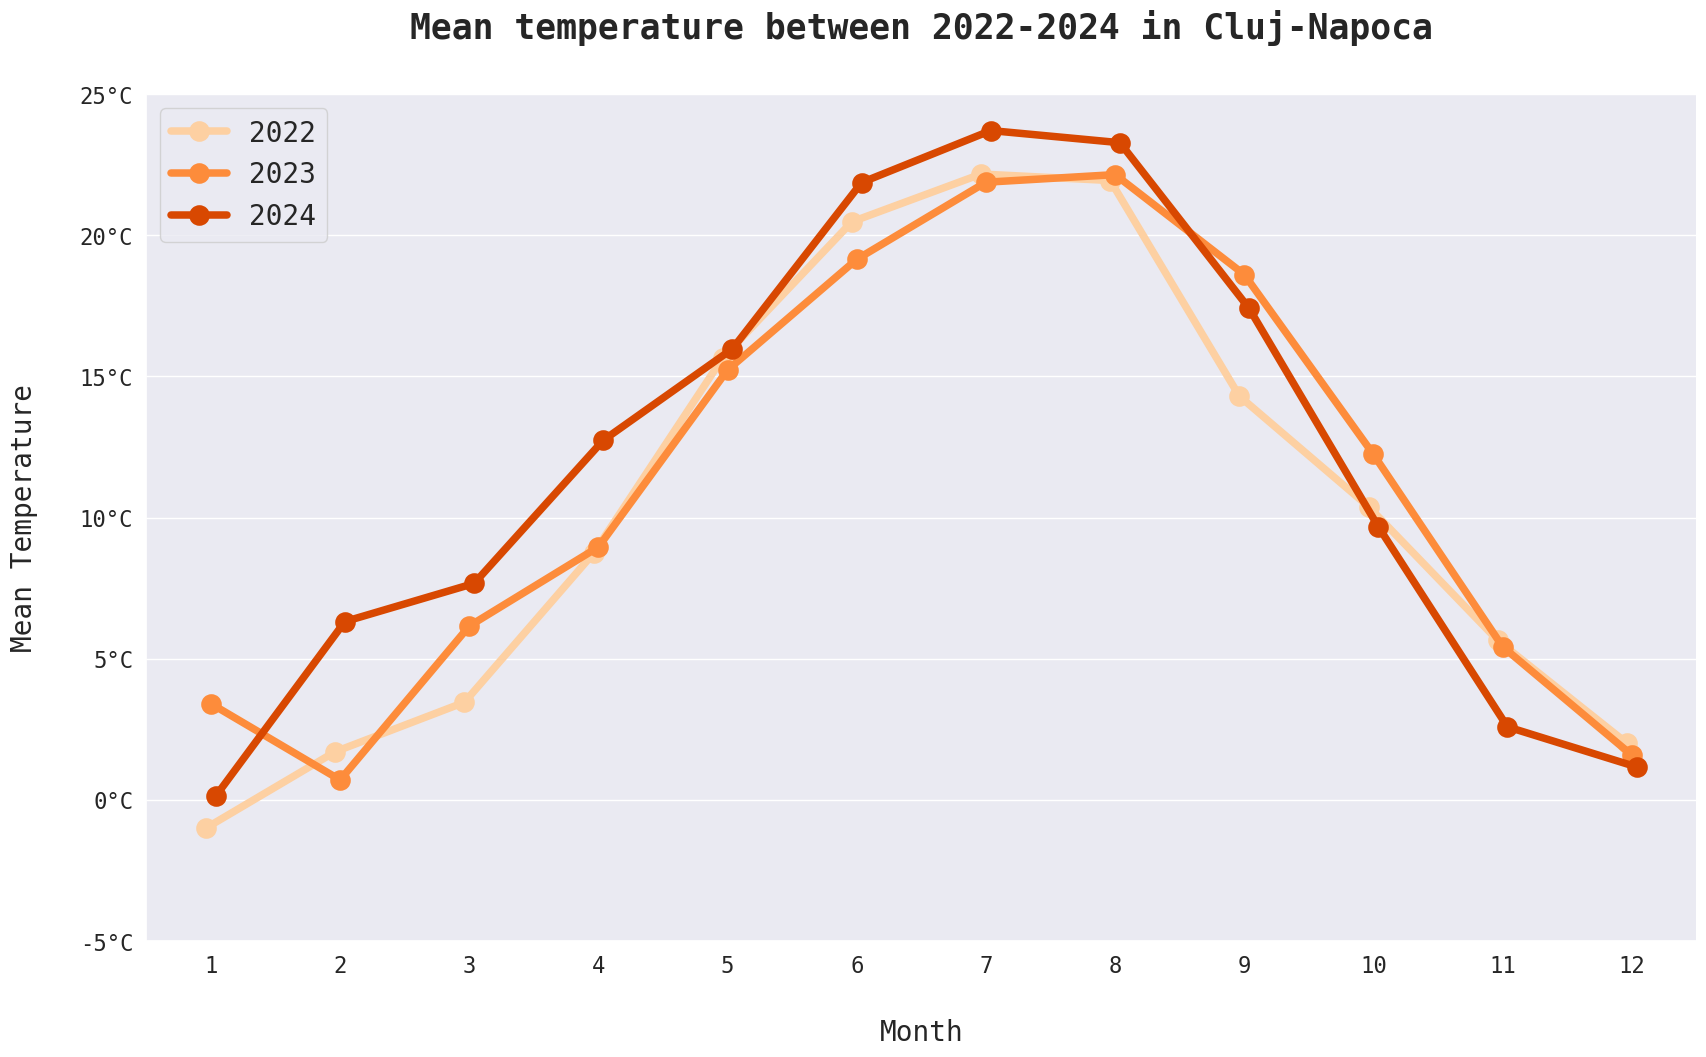

In [31]:
plt.figure(figsize=(20, 11))

plt.rcParams['font.family'] = 'monospace'

# Plot using pointplot
point_plot = sns.pointplot(data=df_melted, x = 'Month', y = 'Mean Temperature in Celsius', hue = 'Legend', dodge = True, palette = 'Oranges', scale = 2.0)

plt.xlabel('Month', fontsize = 20, labelpad = 30)
plt.ylabel('Mean Temperature', fontsize = 20, labelpad = 30)

plt.title('Mean temperature between 2022-2024 in Cluj-Napoca', fontsize = 25, fontweight = 'bold', pad = 40)

yticks = point_plot.get_yticks()  # Get original y-axis values
point_plot.set_yticks(yticks)  # Set the new y-ticks at the same positions
# point_plot.set_yticklabels([f"{int(y / 1000000)}" for y in yticks])  # Multiply labels by 10

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'upper left', prop = {'size': 20})

plt.gca().yaxis.set_major_formatter(FuncFormatter(celsius_formatter))

sns.despine()

plt.show()

## Join 2022 - 2024 average precipitations in one single graph

In [32]:
# Sample DataFrame
temp_data = {
    'Month': months_single,
    '2022': prcp_mm_2022,
    '2023': prcp_mm_2023,
    '2024': prcp_mm_2024
}
temp_df = pd.DataFrame(temp_data)

# Reshape the DataFrame to long format for Seaborn
df_melted = temp_df.melt(id_vars=['Month'], value_vars=['2022', '2023', '2024'], 
                     var_name = 'Legend', value_name = 'Mean PRCP in mm')

In [33]:
def mm_formatter(x, pos):
    
    return f'{x:.0f} mm'

## Displaying the graph for precipitations

/var/folders/xy/51wr98g97xn6sv90wcdyfjf40000gn/T/ipykernel_12044/2269444495.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  point_plot = sns.pointplot(data=df_melted, x = 'Month', y = 'Mean PRCP in mm', hue = 'Legend', dodge = True, palette = 'Blues', scale = 2.0)


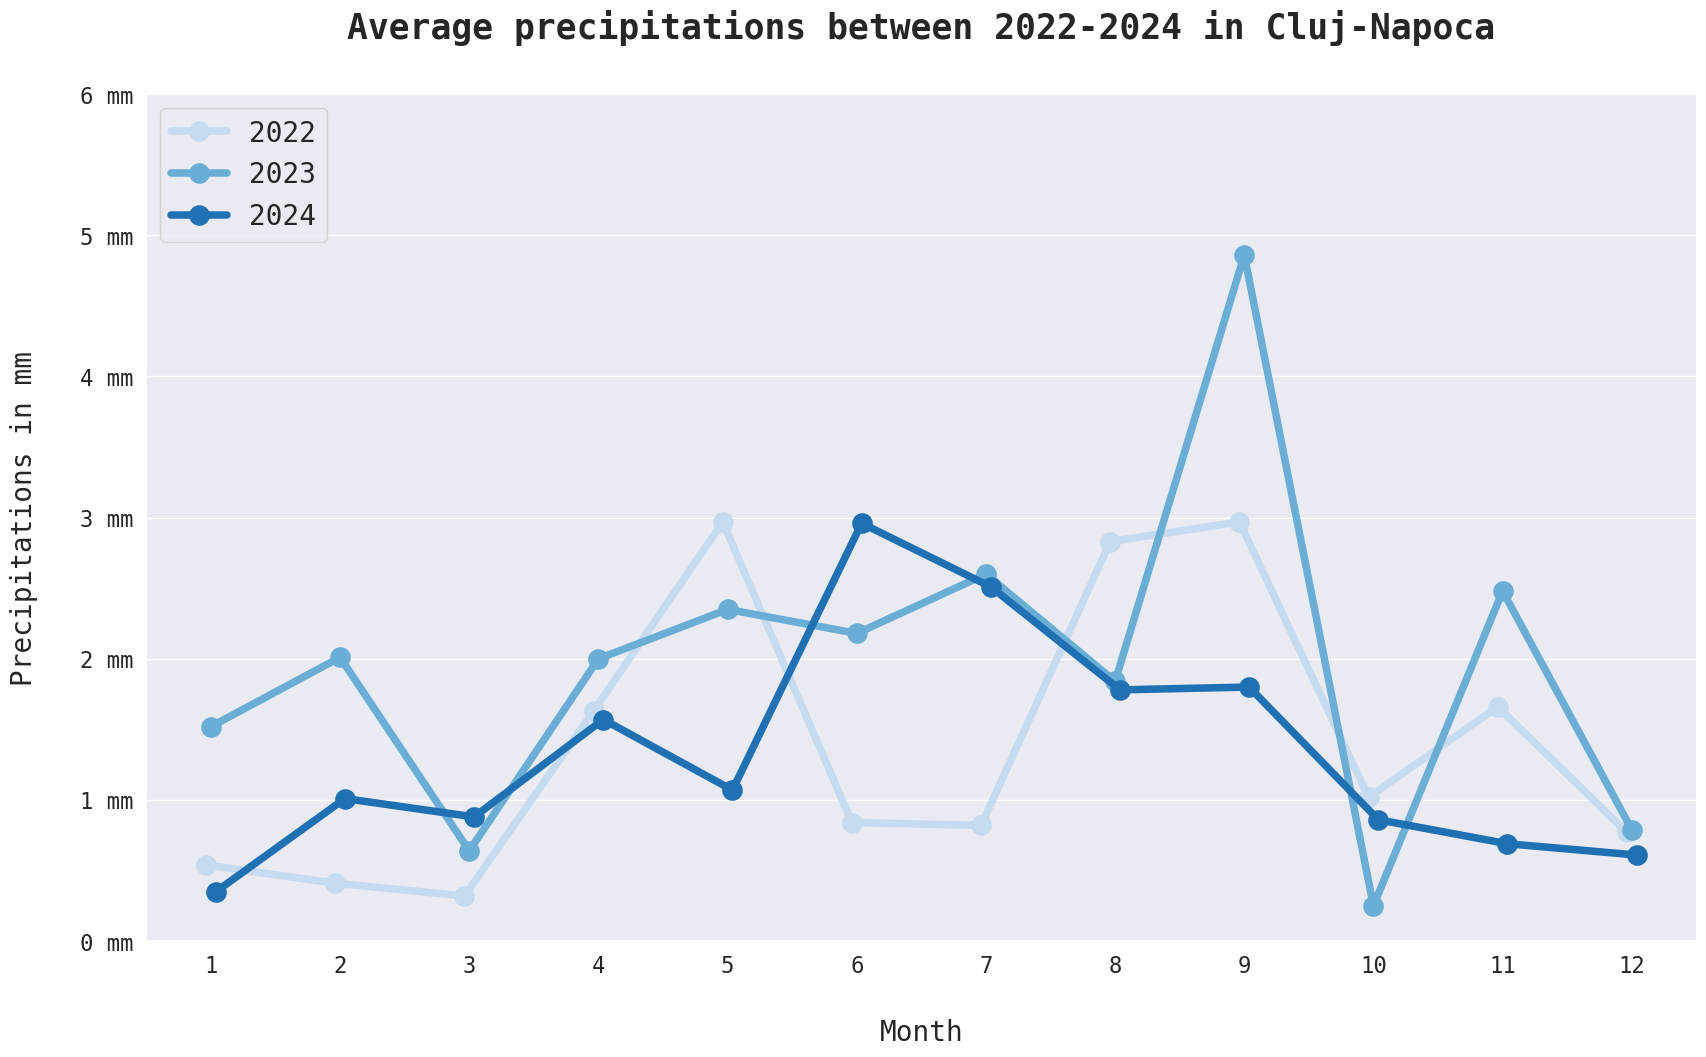

In [34]:
plt.figure(figsize=(20, 11))

# plt.rcParams['font.family'] = 'monospace'

# Plot using pointplot
point_plot = sns.pointplot(data=df_melted, x = 'Month', y = 'Mean PRCP in mm', hue = 'Legend', dodge = True, palette = 'Blues', scale = 2.0)

plt.xlabel('Month', fontsize = 20, labelpad = 30)
plt.ylabel('Precipitations in mm', fontsize = 20, labelpad = 30)

plt.title('Average precipitations between 2022-2024 in Cluj-Napoca', fontsize = 25, fontweight = 'bold', pad = 40)

yticks = point_plot.get_yticks()  # Get original y-axis values
point_plot.set_yticks(yticks)  # Set the new y-ticks at the same positions
# point_plot.set_yticklabels([f"{int(y / 1000000)}" for y in yticks])  # Multiply labels by 10

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'upper left', prop = {'size': 20})

plt.gca().yaxis.set_major_formatter(FuncFormatter(mm_formatter))

sns.despine()

plt.show()

### Make the final cvs file - mean temp and prcp between 2022 - 2024

In [35]:
final_avg_temp_celsius = np.round(celsius_avg_temp_np, 2)

final_avg_temp_celsius

array([-0.99,  1.71,  3.46,  8.74, 15.66, 20.48, 22.17, 21.94, 14.3 ,
       10.39,  5.65,  2.01,  3.41,  0.71,  6.16,  8.96, 15.23, 19.15,
       21.88, 22.15, 18.61, 12.24,  5.43,  1.59,  0.14,  6.32,  7.67,
       12.74, 15.98, 21.87, 23.71, 23.28, 17.41,  9.68,  2.59,  1.17])

In [36]:
final_prcp_mm = np.round(mm_avg_prcp_np, 2)

final_prcp_mm

array([0.54, 0.41, 0.32, 1.63, 2.97, 0.84, 0.82, 2.83, 2.97, 1.02, 1.66,
       0.77, 1.52, 2.01, 0.64, 2.  , 2.35, 2.18, 2.6 , 1.84, 4.86, 0.25,
       2.48, 0.79, 0.35, 1.01, 0.88, 1.57, 1.07, 2.96, 2.51, 1.78, 1.8 ,
       0.86, 0.69, 0.61])

In [37]:
final_df = pd.DataFrame({
    'Year': all_years,
    'Month': all_months,
    'Average Temperature': final_avg_temp_celsius,
    'Average Precipitation': final_prcp_mm
})

final_df

,Year,Month,Average Temperature,Average Precipitation
0,2022,1,-0.99,0.54
1,2022,2,1.71,0.41
2,2022,3,3.46,0.32
3,2022,4,8.74,1.63
4,2022,5,15.66,2.97
5,2022,6,20.48,0.84
6,2022,7,22.17,0.82
7,2022,8,21.94,2.83
8,2022,9,14.30,2.97
9,2022,10,10.39,1.02


#### Saving the final DataFrame in an Excel file

In [38]:
final_df.to_excel('temp_prcp.xlsx', index = False)